# Predict medical expenses using linear regression

Data Info -
#age: An integer indicating the age of the primary beneficiary
#sex: The policy holder's gender, either male or female.
#bmi: The body mass index (BMI), which provides a sense of how over- or under-weight a person is relative to their height
#children: An integer indicating the number of children/dependents covered by the insurance plan.
#smoker: A yes or no categorical variable that indicates whether the insured regularly smokes tobacco.
#region: The beneficiary's place of residence in the US


# Question 1- Get the data.



The data is given in Olympus with the name insurance.csv. You need to load the data with the help of pandas.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_error, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import scipy.stats as stats
from scipy.stats import zscore

In [4]:
insurance = pd.read_csv("insurance.csv")


In [5]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
insurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Question 2 - Check the distribution of expenses(charges) and state your insights.

{'whiskers': [<matplotlib.lines.Line2D at 0x7f4d0068b6a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f4d0068bf60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f4d0068b550>],
 'medians': [<matplotlib.lines.Line2D at 0x7f4d0061e7f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f4d0061ec18>],
 'means': []}

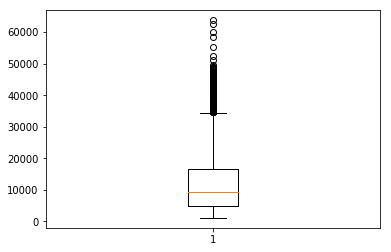

In [8]:
plt.boxplot(insurance["charges"])

Mean: 13270.422265141257
Std Dev: 12105.484975561612


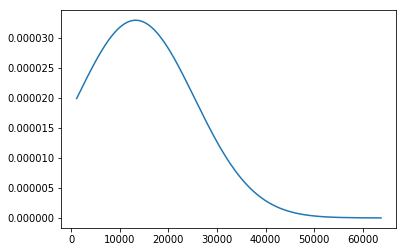

In [9]:
charges = insurance["charges"]
charges = list(charges)
charges.sort()
charges_mean = np.mean(charges)
print("Mean: {}".format(charges_mean))
charges_std = np.std(charges)
print("Std Dev: {}".format(charges_std))
pdf = stats.norm.pdf(charges, charges_mean, charges_std)
plt.plot(charges, pdf)

### as per the normalized curve, right tail is skewed; so distribution of charges spread at the right tail of the normalized 
### curve with mean of 13270.422 and standard deviation of 12105.484

# Question 3 - Explore the relationship between variables. 

You can use corr() function or any other function to do the same.

In [10]:
insurance.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [11]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Question 4 - Use charges as dependent feature and Get the train and test data from your dataset.

In [12]:
x = insurance.drop("charges", axis=1)
y = insurance[["charges"]]
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=1)

# Question 5 - Create the dummies for the categorical variables/features for both train and test independent data.

You can use pd.get_dummies() function to do so.

In [13]:
x_train[["female","male"]] = pd.get_dummies(x_train["sex"])
x_train[["non_smoker", "smoker"]] = pd.get_dummies(x_train["smoker"])
x_train[["northeast","northwest","southeast","southwest"]] = pd.get_dummies(x_train["region"])
x_train[["0_children","1_child","2_children","3_children","4_children","5_children"]]=pd.get_dummies(x_train["children"])

/usr/local/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [14]:
x_test[["female","male"]] = pd.get_dummies(x_test["sex"])
x_test[["non_smoker", "smoker"]] = pd.get_dummies(x_test["smoker"])
x_test[["northeast","northwest","southeast","southwest"]] = pd.get_dummies(x_test["region"])
x_test[["0_children","1_child","2_children","3_children","4_children","5_children"]]=pd.get_dummies(x_test["children"])

/usr/local/anaconda/lib/python3.6/site-packages/pandas/core/frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [15]:
x_train= x_train.drop(["sex","children","region"], axis=1)
x_test = x_test.drop(["sex","children","region"], axis=1)

In [16]:
x_test.sample(6)

,age,bmi,smoker,female,male,non_smoker,northeast,northwest,southeast,southwest,0_children,1_child,2_children,3_children,4_children,5_children
395,46,19.855,0,0,1,1,0,1,0,0,1,0,0,0,0,0
916,43,26.885,1,1,0,0,0,1,0,0,1,0,0,0,0,0
644,43,35.310,0,0,1,1,0,0,1,0,0,0,1,0,0,0
169,27,18.905,0,0,1,1,1,0,0,0,0,0,0,1,0,0
194,18,34.430,0,0,1,1,0,0,1,0,1,0,0,0,0,0
571,18,37.290,0,1,0,1,0,0,1,0,0,1,0,0,0,0


In [17]:
x_train.sample(4)

,age,bmi,smoker,female,male,non_smoker,northeast,northwest,southeast,southwest,0_children,1_child,2_children,3_children,4_children,5_children
977,26,29.15,0,0,1,1,0,0,1,0,0,1,0,0,0,0
817,23,37.10,0,0,1,1,0,0,0,1,0,0,0,1,0,0
1177,40,27.40,0,1,0,1,0,0,0,1,0,1,0,0,0,0
812,54,21.01,0,0,1,1,0,0,1,0,0,0,1,0,0,0


# Question 6 - Train your model.

In [18]:
linear_reg_model = LinearRegression()
linear_reg_model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Question 7 - Fit your model and get the summary of model. Print the coefficients.

In [19]:
linear_reg_model.coef_

array([[   252.38926683,    321.47531432,  12005.88765848,
           143.00077379,   -143.00077379, -12005.88765848,
           519.44990232,    212.22579819,   -399.03091515,
          -332.64478536,   -795.17882911,  -1172.59060046,
           639.69710212,   -279.36908685,   1417.25424486,
           190.18716944]])

In [20]:
linear_reg_model.intercept_

array([1219.64886542])

# Question 8 - Predict the charges for test data and evaluate the model performance. 

You can get the values of MAE, MSE, RMSE to show the evaluation parameters of your model

In [21]:
print(" testing data accuracy {}".format(linear_reg_model.score(x_test,y_test)))

 testing data accuracy 0.7380138769361969


In [22]:
print("training data accuracy {}".format(linear_reg_model.score(x_train,y_train)))

training data accuracy 0.7563244010045014


In [23]:
y_pred = linear_reg_model.predict(x_test)
print("Mean squared Error is {}".format(mean_squared_error(y_test,y_pred)))

Mean squared Error is 37127801.71142003


In [24]:
print("RMSE is {}".format(np.sqrt(mean_squared_error(y_test,y_pred))))

RMSE is 6093.258710363448


In [25]:
print("MAE is {}".format(mean_absolute_error(y_test,y_pred)))

MAE is 4185.846194806005


# Naive Bayes with IRIS Data

# Question 9 - Import Iris dataset from Sklear lib and slice the data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

#### **Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

In [26]:
iris = pd.read_csv("iris.csv")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Question 10 - Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

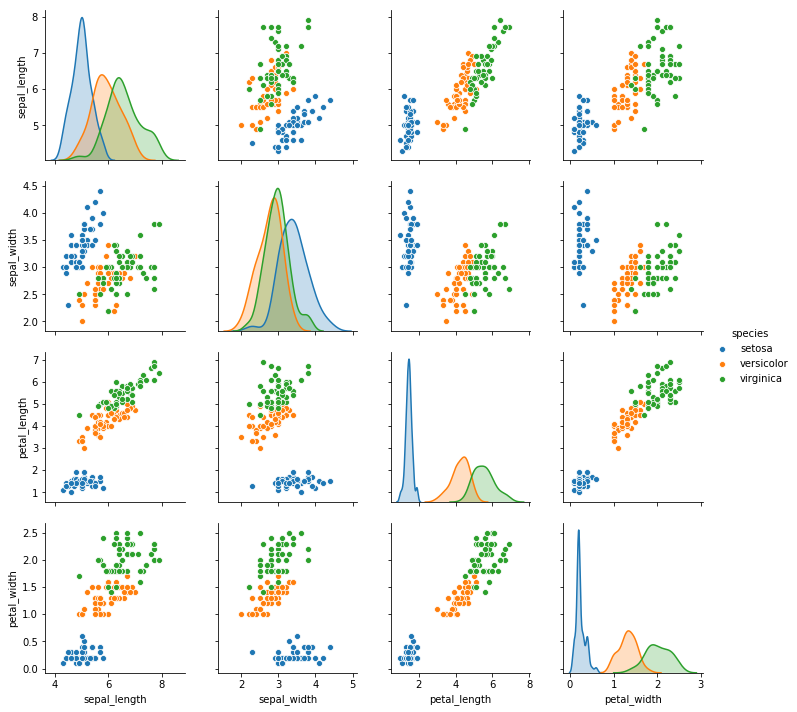

In [28]:
sns.pairplot(iris, hue="species")

# Answer Insight 1. sepal_width and sepal_length overlapping each other
# Answer Insight 2. When petal_length is increasing then petal_width also increasing


## Question 11- Do Feature Scaling 

In [29]:
X = iris.drop(["species"], axis = 1)
y = iris[["species"]]

In [30]:
std_scaler = StandardScaler()
std_scaler.fit_transform(X)

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [31]:
X = X.apply(zscore)
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


## Question 12- Train and Fit NaiveBayes Model

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=1)

In [33]:
gnb_model = GaussianNB()

In [34]:
gnb_model.fit(x_train,y_train)

/usr/local/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB(priors=None)

## Question 13 - Print Accuracy and Confusion Matrix and Conclude your findings

In [35]:
print("Test data accuracy is {}".format(gnb_model.score(x_test,y_test)))

Test data accuracy is 0.9333333333333333


In [37]:
print("Training data accuracy is {}".format(gnb_model.score(x_train,y_train)))

Training data accuracy is 0.9523809523809523


In [38]:
y_pred = gnb_model.predict(x_test)

In [39]:
confusion_matrix(y_test,y_pred)

array([[14,  0,  0],
       [ 0, 16,  2],
       [ 0,  1, 12]])

# Ensemble Methods

## Question 14-  Apply the Random forest model and print the accuracy of Random forest Model


In [40]:
rfclassmodel = RandomForestClassifier()

In [41]:
rfclassmodel.fit(x_train,y_train)

/usr/local/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [42]:
print("test data score {}".format(rfclassmodel.score(x_test,y_test)))

test data score 0.9555555555555556


In [44]:
print("training data score {}".format(rfclassmodel.score(x_train,y_train)))

training data score 1.0


In [45]:
y_pred = rfclassmodel.predict(x_test)


In [46]:
confusion_matrix(y_test, y_pred)

array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 12]])

## Question 15 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [47]:
gbclassmodel = GradientBoostingClassifier()


In [48]:
gbclassmodel.fit(x_train,y_train)

/usr/local/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [49]:
print("test data score {}".format(gbclassmodel.score(x_test,y_test)))

test data score 0.9555555555555556


In [50]:
print("training data score {}".format(gbclassmodel.score(x_train,y_train)))

training data score 1.0


In [51]:
y_pred = gbclassmodel.predict(x_test)

In [52]:
confusion_matrix(y_test,y_pred)

array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 12]])